In [28]:
import os
import re
import sys
import numpy as np
import periodictable as pt
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import DBSCAN
from sklearn import decomposition
import seaborn as sns
import sklearn.datasets as data
import pandas as pd

import hdbscan
import umap.umap_ as umap

#add the parent folder to sys path so we can import from the notebook subfolder
sys.path.insert(0,'..')



BASEDIR = "/home/lachlan/"
TIFDIR = "DATA/datasets/XFMDATA/Zoe/slides_99um/s4"
EXT='.tiff'

image_directory = os.path.join(BASEDIR, TIFDIR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4
['/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Al.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-As.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Ca.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Cl.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Cr.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Cu.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Fe.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-K.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Mg.tiff', '/home/lachlan/DATA/datasets/XFMDATA/Zoe/slides_99um/s4/full_99um_s4_cali-Mn.tiff', '/home/lachlan/DA

Epochs completed: 100%| ██████████ 200/200 [00:17]

Wed Apr  5 22:58:03 2023 Finished embedding
SCAN PARAM 0.01


(61335, 18)
Mg
0.0 0.5265370607376099 1.458012580871582


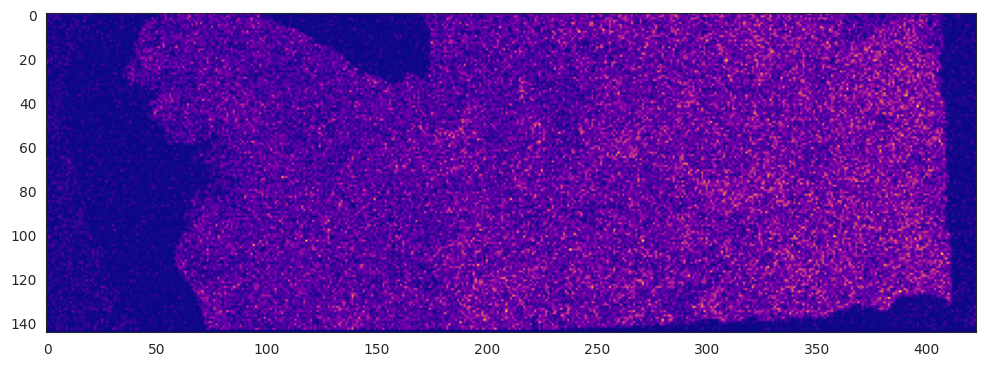

17
(61335,)
-1
0


../xfmreadout/processed_plots.py:166: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


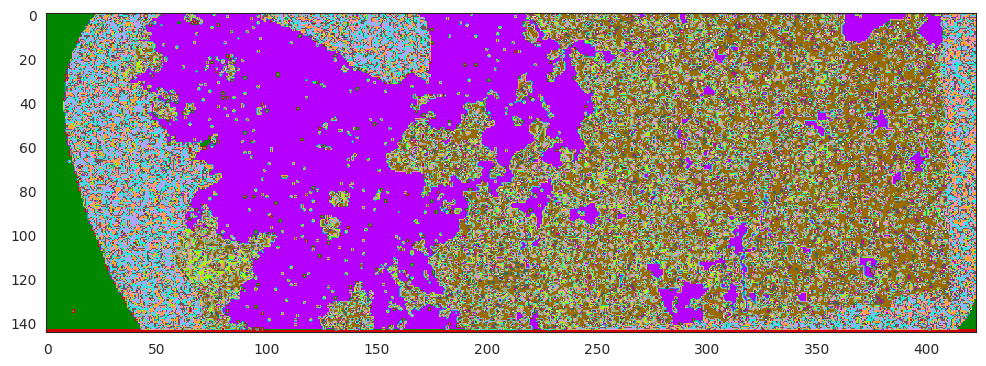

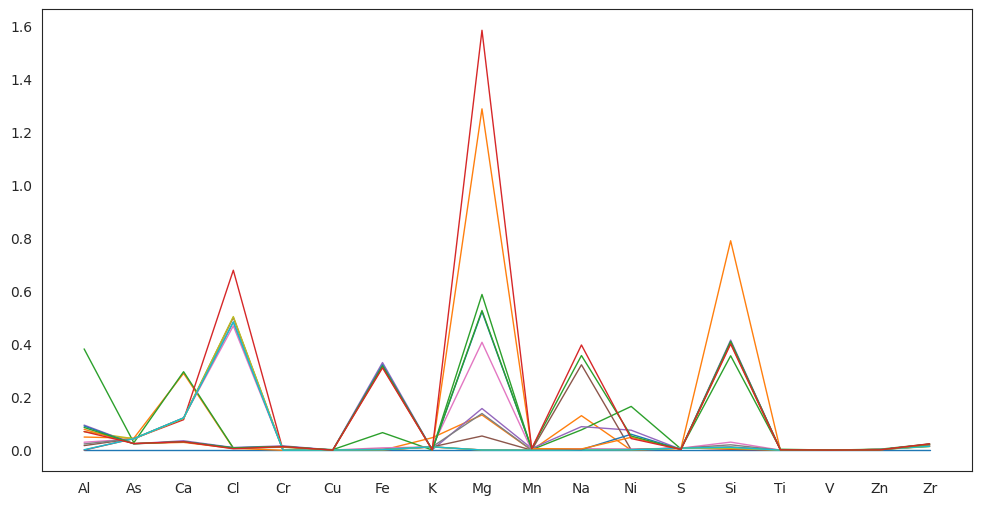

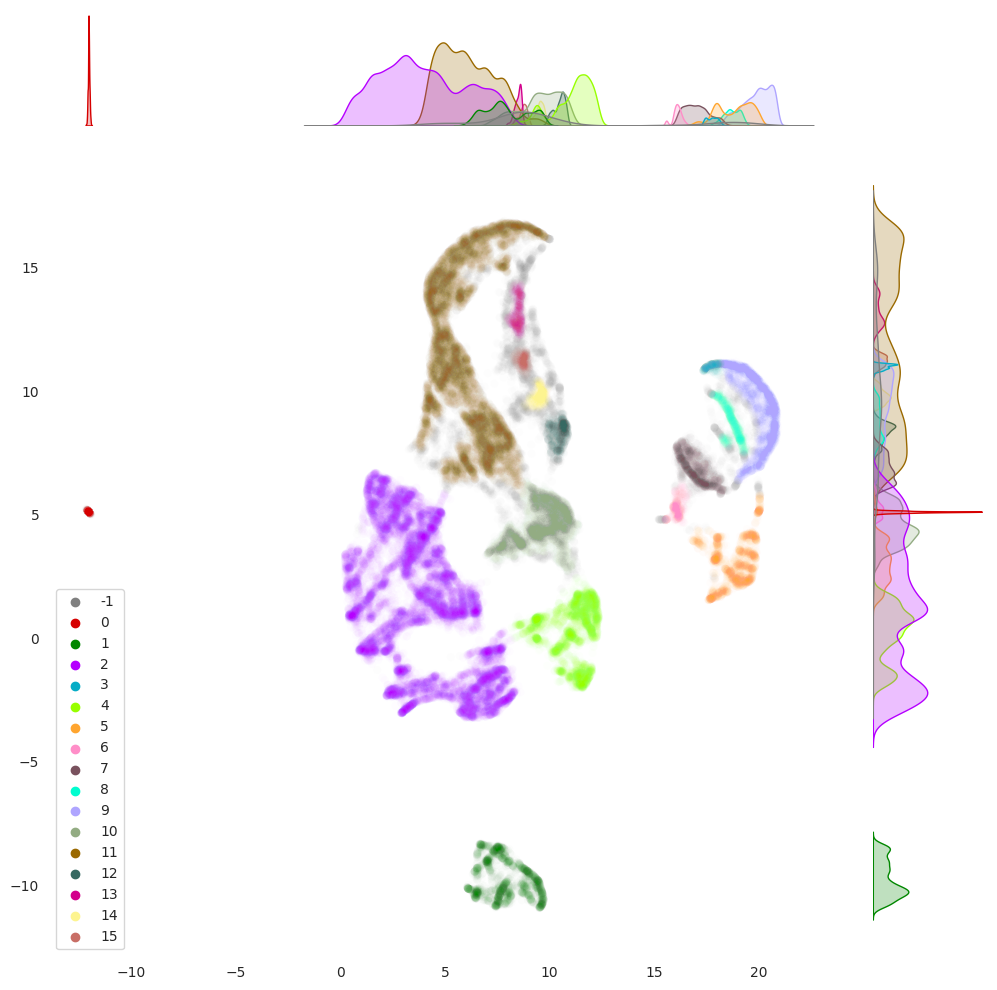

Al, 7.249753952026367
As, 0.09185709059238434
Ca, 1.2336984872817993
Cl, 0.8905055522918701
Cr, 1.6013542413711548
Cu, 0.7907636761665344
Fe, 5.973607540130615
K, 0.0954536721110344
Mg, 4.294328689575195
Mn, 0.12286162376403809
Na, 4.14034366607666
Ni, 6.570156097412109
S, 0.28102803230285645
Si, 3.241650342941284
Ti, 0.04839624837040901
V, 0.027112221345305443
Zn, 0.038228001445531845
Zr, 0.7285010814666748


In [46]:
%load_ext autoreload
%autoreload 2

import xfmreadout.clustering as clustering
import xfmreadout.processed_ops as processed_ops
import xfmreadout.processed_plots as processed_plots

FORCE=False

data, elements, dims = processed_ops.get_data(image_directory)

print(f"-----{elements[10]} tracker: {np.max(data[:,10])}")
categories, classavg, embedding, clusttimes, data, dims = processed_ops.process(data, dims, image_directory, force=True)
print(f"-----{elements[10]} tracker: {np.max(data[:,10])}")

processed_ops.plot_all(categories, classavg, embedding, data, elements, dims)

for i in range(len(elements)):
    print(f"{elements[i]}, {np.max(data[:,i])}")


In [27]:
print(max(data[10]))
print(elements[10])

0.93018293
Na


In [142]:
print(np.max(categories), np.min(categories))
classavg.shape

15 -1


(16, 19)